In [30]:
# Adapted From https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Adapted From https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8

# imports 
import tensorflow as tf

# import the mnist dataset from keras
from keras.datasets import mnist
# matplotlib used to visualise the data
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [31]:
# Loading in the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
# (Amount of images in the dataset, Rows of pixels, Cols of pixels)
x_train.shape

(60000, 28, 28)

5


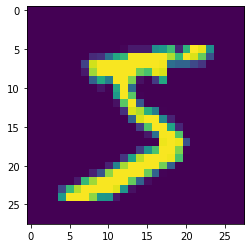

In [44]:
%matplotlib inline 
image_index = 0
print(y_train[image_index])
# Prints out the first image as it appears in the file
plt.imshow(x_train[image_index])

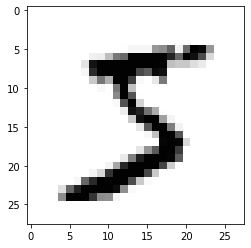

In [34]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Printing the first image out in greyscale
plt.imshow(x_train[image_index], cmap='Greys')

In [45]:
# The input shape that the CNN expects is a 4D Array - batch, height, width, channels
# The channels show whether the image is greyscaled or coloured
# 1 is given because greyscaled images are being used (3 for coloured)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
# dataset has each pixel between 0-255, it is now 0-1
# http://aishack.in/tutorials/normalized-rgb/
x_train /= 255
x_test /= 255

# print outs
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [19]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 58s 974us/step - loss: 0.2031 - accuracy: 0.9388
Epoch 2/10
60000/60000 [==============================] - 58s 972us/step - loss: 0.0815 - accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0554 - accuracy: 0.9832
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0443 - accuracy: 0.9852
Epoch 5/10
60000/60000 [==============================] - 53s 880us/step - loss: 0.0336 - accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0273 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 52s 872us/step - loss: 0.0251 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0192 - accuracy: 0.9936
Epoch 10/10
60000/60000 [====================

In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 197us/step


[0.05667220985188232, 0.9861000180244446]

7


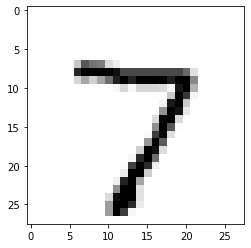

In [39]:
# prints out the first image in the test dataset
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())